# Introduction to Random Forest

---

Sources:

* Class material from General Assembly Data Science Immersive Course
* Stackoverflow: https://stackoverflow.com
* StatQuest with Josh Starmer: https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw

## What is a Random Forest?

---

Random Forests are some of the most widespread classifiers used. They are relatively simple to use because they require very few parameters to set and they perform well. As we have seen, Decision Trees are very powerful machine learning models.

Decision Trees have some critical limitations. In particular, trees that are grown very deep tend to learn highly irregular patterns: they overfit their training sets. **In other words: they work great with the data used to create them, but they are not flexible when it comes to classifying new samples**. However Random forests are a further way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. This comes at the expense of a small increase in the bias and some loss of interpretability, but generally greatly boosts the performance of the final model. **Random Forests then combine the simplicity of decision trees with flexibility, resulting in a vast improvement in accuracy**.

### Feature bagging

Random forests differ from bagging decision trees in only one way: they use a modified tree learning algorithm that selects, at each candidate split in the learning process, a random subset of the features. This process is sometimes called feature bagging. 

The reason for doing this is due to correlation of trees in an ordinary bootstrap sample: if one or a few features are very strong predictors for the response variable (target output), these features will be selected in many of the bagging base trees, causing them to become correlated. By selecting a random subset of the features at each split, we avoid this correlation between base trees, strengthening the overall model.

#### For a problem with p features, it is typical to use:
- $p^{1/2}$ (rounded down) features in each split for a classification problem.
- $p/3$ (rounded down) with a minimum node size of 5 as the default for a regression problem.


#### Sklearn implementation
- [Sklearn Random Forest Regressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
- [Sklearn Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

## Random Forest theorical explination in 3 simple steps

---

1. **Step 1: We need a bootstrap dataset**

To create a boostrapped dataset that is the same size as the original, we just randomly select samples from the original dataset. The important detail is that **we're allowed to pick** the same sample more than once.

2. **Step 2: Create a Decision Trees**

Now we build our model, but only using a **random** subset of variables/features/columns at each step. Once we've identified the feature that did the best job separating the samples, we build the tree as usual, but only considerand a random subset of variables at each step.

3. **Step 3: go back to Step 1 and repeat**

Making a new bootstrapped dataset and building a tree considering a subet of variables at each step. Ideally, doing this hundreds of times.

Using a boostrapped sample and considering only a subset of variables at each step results in a wide variety of trees. This variety is what makes random forests more effective than individual decision trees.

## How do we use Random Forests?
---

After running the data down all of the trees in the Random Forest, we see which option received more votes in our classification problem. For example, suppose we're trying to predict "Dog" or "Cat" out of several animal characteristics and we create a Random Forest with 500 iterations. If at the end, 470 models would have predicted "Cat" and only 30 models "Dog", our final category would be of course "Cat".

Boostrapping the data and using the aggregate to make a decision is the definition of **BAGGING**.

## The out-of-bag sample
---

Each time we boostrap a sample, about 1/3 of it doesn't get into the boostrapped sample. And we could take those rows as our test group to evaluate our model. Measuring how accurate our Random Forest is by the proportion of out-of-bag samples that were correctly classified.

The proportion of out-of-bag samples that were incorrectly classified is often called the 'out-of-bag error'.

## Let's work over one exmaple with the Boston housing dataset
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

### Loading the Boston housing dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print((boston.data.shape))

(506, 13)


In [3]:
# The Boston housing dataset is divided into several files
# We can check those files names by calling boston.keys()

list(boston.keys())

['data', 'target', 'feature_names', 'DESCR', 'filename']

In [4]:
# And we can check the description of the dataset calling boston.DESCR

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Features/columns names

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# Assigning data and target out of pre-built files

X = pd.DataFrame(boston['data'], columns=boston.feature_names)
y = pd.DataFrame(boston.target)

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Splitting data into train and test sets and rescaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=boston.feature_names)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=boston.feature_names)

y_train = scaler.fit_transform(y_train)
y_train.shape = (len(y_train),)

y_test = scaler.transform(y_test)
y_test.shape = (len(y_test),)

In [10]:
y_train.shape, y_test.shape

((404,), (102,))

### Fitting the data using a decision tree regressor on the training data and obtaining mean squared and r2 error for the test set for a maximal tree depth of three

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor(max_depth=3, random_state=1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('Training error: ')
print('MSE: ', mean_squared_error(y_train, model.predict(X_train)))
print('R2: ', r2_score(y_train, model.predict(X_train)))

print('Test error: ')
print('MSE: ', mean_squared_error(y_test, predictions))
print('R2: ', r2_score(y_test, predictions))

Training error: 
MSE:  0.18304363952308936
R2:  0.8169563604769107
Test error: 
MSE:  0.1552980824710956
R2:  0.816029223482161


### Visualising the resulting decision tree

In [30]:
from os import system
from sklearn.tree import export_graphviz


def build_tree_image(model, filename='tree.png'):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file=dotfile, feature_names=X.columns, filled=True,
                    rounded=True, special_characters=True)
    dotfile.close()
    # comment out this line if you don't have GraphViz yet
    system("dot -Tpng tree.dot -o {0}".format(filename))

In [31]:
build_tree_image(model, 'tree.png')

<img src='./tree.png' width = 80%>

### Performing Grid Search varying the maximal tree depth, the maximal number of leaf nodes and the minimal number of samples in the leafs

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
model.get_params()

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'best'}

In [34]:
kfolds = 5
model = DecisionTreeRegressor(random_state=1)

In [38]:
# Grid Search
params = {'max_depth': [1, 3, 5],
          'max_features':[1,3,5],
          'max_leaf_nodes': [2,3,5],
          'min_samples_leaf': [2,3,5],
          'min_samples_split':[2,2,3]}

gs = GridSearchCV(model, param_grid=params, cv=kfolds)
gs.fit(X_train, y_train)

model = gs.best_estimator_
print(gs.best_estimator_)
print('R2 training: ', gs.score(X_train, y_train))
print('R2 test: ', gs.score(X_test, y_test))

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=5,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')
R2 training:  0.6884819705474974
R2 test:  0.6483468129011942


/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
# Checking out the best model

gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=5,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [41]:
# Checking out the best params. We can see it could be easily improved

gs.best_params_

{'max_depth': 3,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

### Now we'll use ensemble methods to fit decision trees. For BaggingRegressor and RandomForestRegressor, we'll vary the number of estimators (`n_estimators`), using cross_val_score with five-fold cross validation

In [42]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [62]:
def do_cross_val(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, n_jobs=1)
    return scores.mean()

In [71]:
# First we're gonna run some 'heavy' Grid Search to find some neat parameters
# for our Random Forest, and then we're gonna run our Bagging-Random Forest comparison

test_model = RandomForestRegressor(n_estimators = 500)

grid = {'max_features': [0.4,0.6,0.8,1],
       'max_depth': [2,5,10,15],
       'max_leaf': [2,5,10,20],
       'min_samples_leaf': [2,3,5],
       'min_samples_split':[2,3,5]}

test_gs = GridSearchCV(test_model, param_grid=params, cv=3)

test_gs.fit(X_train, y_train)

model = gs.best_estimator_
print(gs.best_estimator_)
print('R2 training: ', test_gs.score(X_train, y_train))
print('R2 test: ', test_gs.score(X_test, y_test))

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=5,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')
R2 training:  0.8126014148247207
R2 test:  0.7383655717347707


In [63]:
# As we saw before, matching the right params, we can achieve better scores
# than the ones we obtained just with a Decision Tree
# Now let's run our comparison Bagging vs Random Forest

score_list = []

for n in np.logspace(0, 2, 10, dtype=int):
    
    models = [('Bagging', BaggingRegressor(random_state=1, n_estimators=n)),
              ('RandomForest', RandomForestRegressor(random_state=1, n_estimators=n))]
    
    for model in models:
        
        model[1].fit(X_train, y_train)
        train_score_cv = do_cross_val(model[1], X_train, y_train)
        train_predictions = model[1].predict(X_train)
        test_predictions = model[1].predict(X_test)
        train_score = mean_squared_error(y_train, train_predictions)
        test_score = mean_squared_error(y_test, test_predictions)
        score_list.append([model[0], n, train_score_cv, train_score, test_score])

In [64]:
# As we'll see in the following DataFrame, without tunning the params, we don't
# get a score not even simmilar to the ones we got before

df_scores = pd.DataFrame(score_list, columns=[
                         'model', 'estimators', 'train_mse_cv', 'train_mse', 'test_mse'])

df_scores.sort_values(by='test_mse', ascending=False).head()

,model,estimators,train_mse_cv,train_mse,test_mse
0,Bagging,1,0.721215,0.116916,0.299361
2,Bagging,1,0.721215,0.116916,0.299361
1,RandomForest,1,0.728178,0.108303,0.296353
3,RandomForest,1,0.728178,0.108303,0.296353
7,RandomForest,4,0.815946,0.031734,0.134907


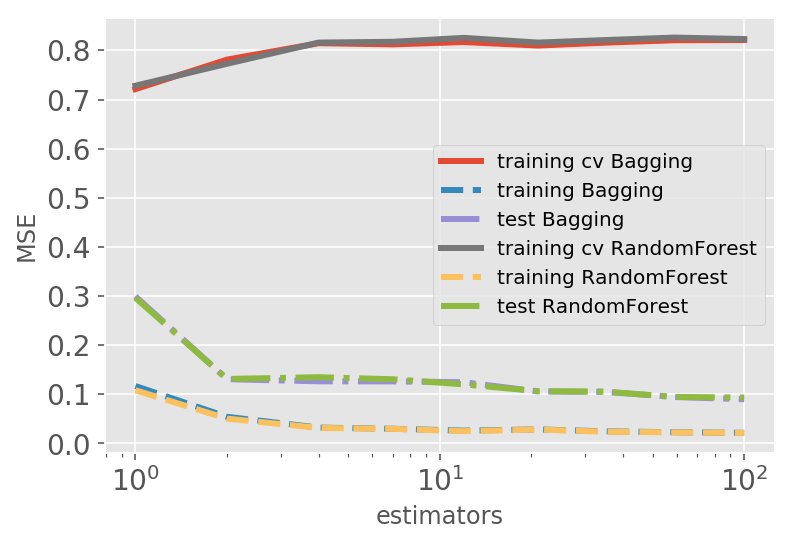

In [65]:
# Finally, let's plot the scores for each model in a chart

groups = df_scores.groupby('model')

fig, ax = plt.subplots()

for group in groups.groups.keys():
    
    groups.get_group(group).plot(x='estimators', y='train_mse_cv', ax=ax,
                                 label='training cv '+group, lw=3, fontsize=14, logx=True)
    groups.get_group(group).plot(x='estimators', y='train_mse', ax=ax,
                                 label='training '+group, lw=3, ls='--', fontsize=14, logx=True)
    groups.get_group(group).plot(x='estimators', y='test_mse', ax=ax,
                                 label='test ' + group, lw=3, ls='-.', fontsize=14, logx=True)

plt.ylabel('MSE')
plt.show()